In [14]:
#!pip install prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [1]:
import pandas as pd

# Lade den OPSD-Zeitreihen-Datensatz
url = "https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv"
df = pd.read_csv(url, parse_dates=['utc_timestamp'])

In [2]:
df

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30 19:00:00+00:00,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30 20:00:00+00:00,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30 21:00:00+00:00,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30 22:00:00+00:00,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [3]:

# Bundesland auswählen – z. B. "DE_BW" (Baden-Württemberg)
df_bw = df[['utc_timestamp', 'AT_load_actual_entsoe_transparency']].copy()
df_bw.rename(columns={'utc_timestamp': 'date', 'AT_load_actual_entsoe_transparency': 'load'}, inplace=True)

# Resample auf tägliche Werte
df_bw = df_bw.set_index('date').resample('D').mean().reset_index()

# Fehlende Werte checken
print(df_bw.isnull().sum())

date    0
load    1
dtype: int64


In [5]:
df_bw

,date,load
0,2014-12-31 00:00:00+00:00,NaN
1,2015-01-01 00:00:00+00:00,6292.916667
2,2015-01-02 00:00:00+00:00,5788.458333
3,2015-01-03 00:00:00+00:00,5445.458333
4,2015-01-04 00:00:00+00:00,5213.458333
...,...,...
2096,2020-09-26 00:00:00+00:00,5860.166667
2097,2020-09-27 00:00:00+00:00,5432.291667
2098,2020-09-28 00:00:00+00:00,6997.666667
2099,2020-09-29 00:00:00+00:00,6957.625000


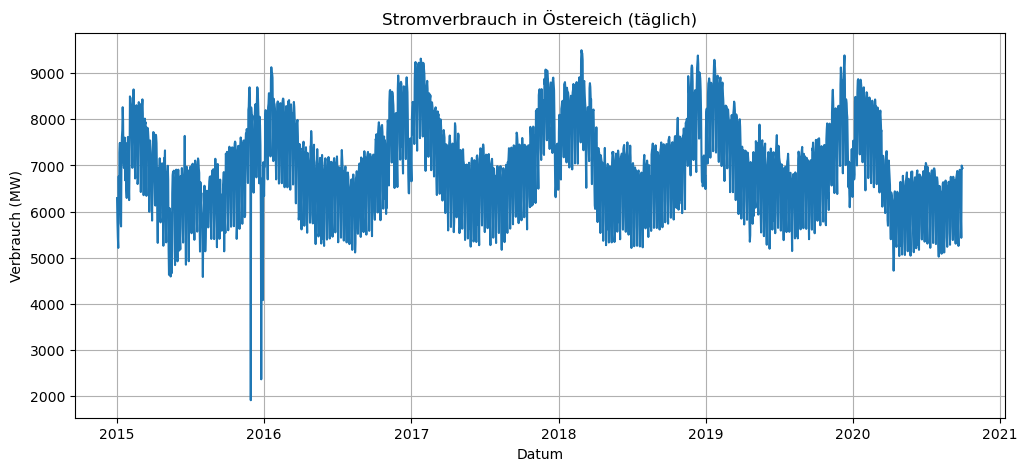

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_bw['date'], df_bw['load'])
plt.title('Stromverbrauch in Östereich (täglich)')
plt.xlabel('Datum')
plt.ylabel('Verbrauch (MW)')
plt.grid(True)
plt.show()


In [7]:
df

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30 19:00:00+00:00,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30 20:00:00+00:00,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30 21:00:00+00:00,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30 22:00:00+00:00,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


08:50:22 - cmdstanpy - INFO - Chain [1] start processing
08:50:22 - cmdstanpy - INFO - Chain [1] done processing


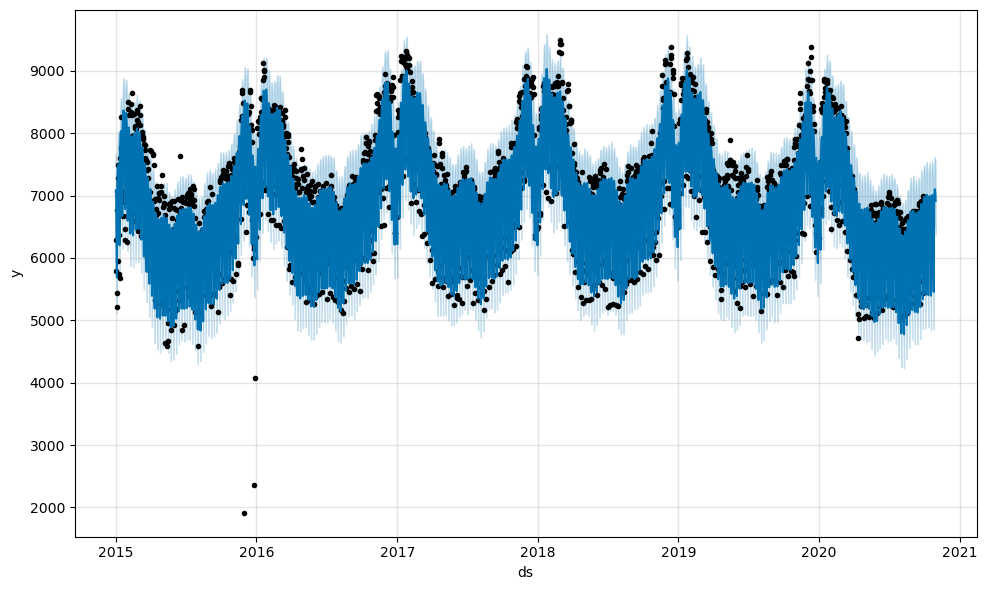

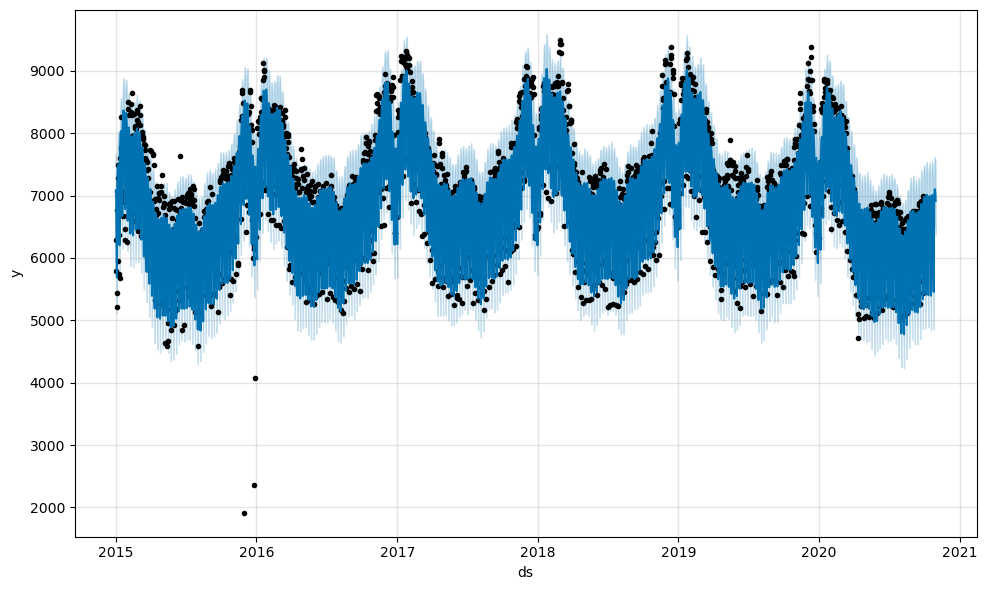

In [8]:
from prophet import Prophet

# Annahme: df_bw enthält bereits die Spalten "date" und "load"
df_prophet = df_bw.rename(columns={'date': 'ds', 'load': 'y'}).dropna()

# 🧼 Zeitzone entfernen
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Modell bauen und trainieren
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df_prophet)

# Zukunftsdaten erzeugen (30 Tage)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plotten
model.plot(forecast)


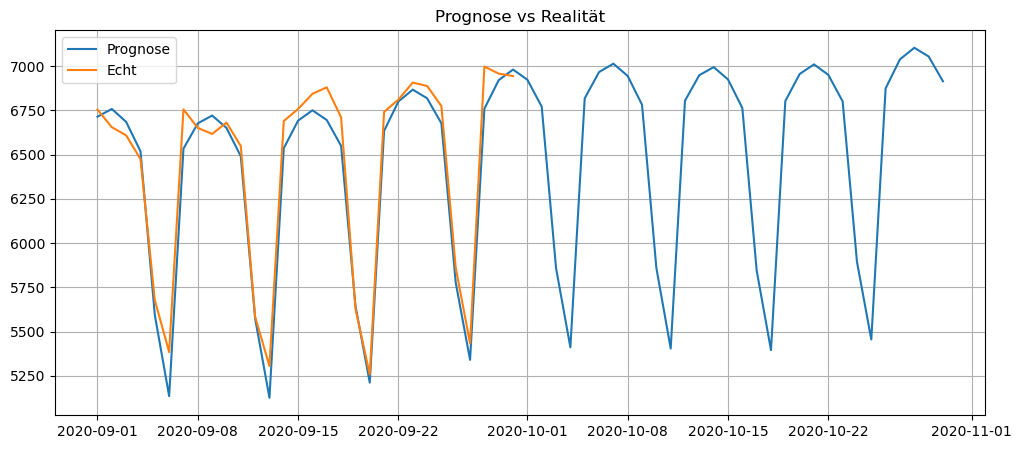

In [15]:
# Nur letzte 60 Tage (real vs prognose)
compare_df = forecast[['ds', 'yhat']].merge(df_prophet, on='ds', how='left')
compare_df = compare_df.tail(60)

plt.figure(figsize=(12, 5))
plt.plot(compare_df['ds'], compare_df['yhat'], label='Prognose')
plt.plot(compare_df['ds'], compare_df['y'], label='Echt')
plt.legend()
plt.title('Prognose vs Realität')
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Nur echte Werte
valid = compare_df.dropna()
mae = mean_absolute_error(valid['y'], valid['yhat'])
rmse = mean_squared_error(valid['y'], valid['yhat'], squared=False)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 91.98, RMSE: 113.74


09:11:09 - cmdstanpy - INFO - Chain [1] start processing
09:11:09 - cmdstanpy - INFO - Chain [1] done processing


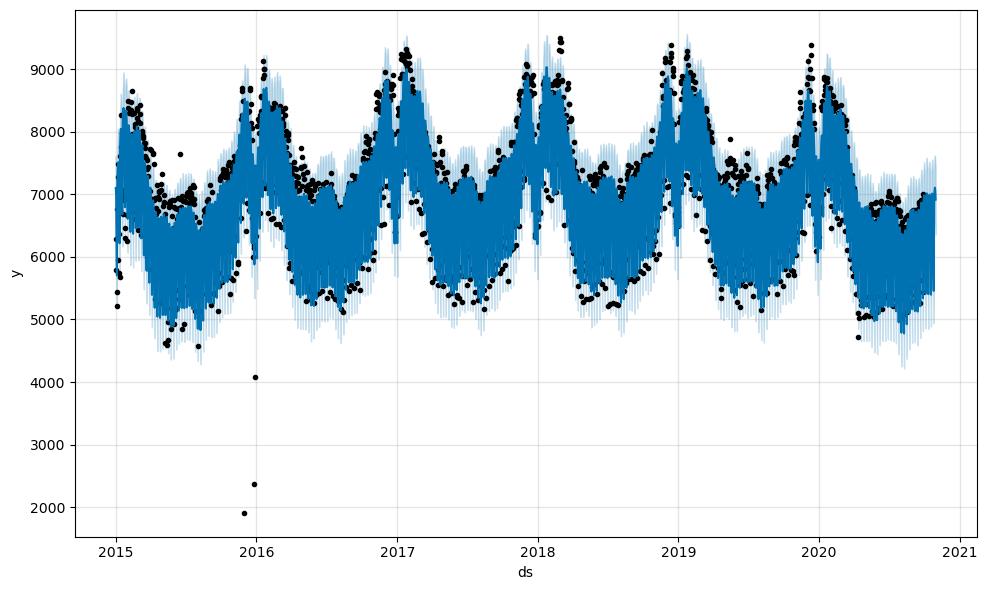

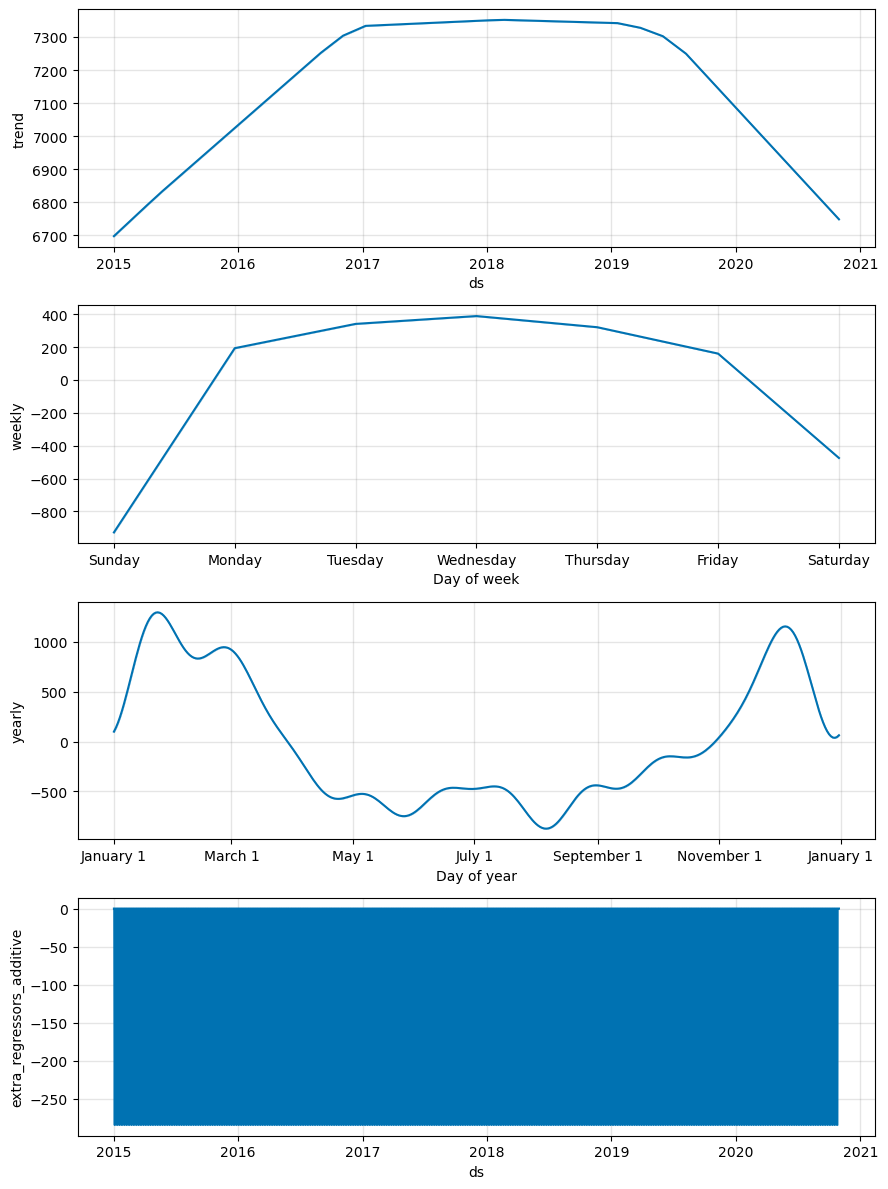

In [10]:
df_bw = df_bw.rename(columns={'date': 'ds', 'load': 'y'}).dropna()
# 1. Stelle sicher, dass ds keine Zeitzone enthält
df_bw['ds'] = pd.to_datetime(df_bw['ds']).dt.tz_localize(None)

# 2. Feature Engineering: Wochenende als zusätzliche Spalte
df_bw['is_weekend'] = df_bw['ds'].dt.dayofweek >= 5  # Samstag=5, Sonntag=6
df_bw['is_weekend'] = df_bw['is_weekend'].astype(int)  # 0 oder 1

# 3. Modell mit Regressor
model = Prophet()
model.add_regressor('is_weekend')  # wir sagen Prophet: das ist wichtig

# 4. Fit mit zusätzlichem Regressor
model.fit(df_bw)

# 5. Erstelle den Zukunftszeitraum
future = model.make_future_dataframe(periods=30)
future['is_weekend'] = future['ds'].dt.dayofweek >= 5
future['is_weekend'] = future['is_weekend'].astype(int)

# 6. Vorhersage
forecast = model.predict(future)

# 7. Plot Ergebnis
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)


In [15]:
# Train/Test Split
train = df_prophet.iloc[:-30]
test = df_prophet.iloc[-30:]

# Modell ohne zusätzliche Features
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(train)

# Vorhersage
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# MAE / RMSE berechnen für die Testperiode
y_true = test['y'].values
y_pred = forecast[-30:]['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Baseline MAE: {mae:.2f}, RMSE: {rmse:.2f}")

10:19:50 - cmdstanpy - INFO - Chain [1] start processing
10:19:51 - cmdstanpy - INFO - Chain [1] done processing


Baseline MAE: 109.21, RMSE: 132.33


In [16]:
from prophet.make_holidays import make_holidays_df

# Feiertage für Österreich (AT)
holidays = make_holidays_df(year_list=[2020, 2021, 2022, 2023], country='AT')

model_holidays = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    holidays=holidays
)
model_holidays.fit(train)

future = model_holidays.make_future_dataframe(periods=30)
forecast = model_holidays.predict(future)

y_pred_holidays = forecast[-30:]['yhat'].values
mae_holidays = mean_absolute_error(y_true, y_pred_holidays)
rmse_holidays = np.sqrt(mean_squared_error(y_true, y_pred_holidays))

print(f"Mit Feiertagen MAE: {mae_holidays:.2f}, RMSE: {rmse_holidays:.2f}")


10:20:42 - cmdstanpy - INFO - Chain [1] start processing
10:20:42 - cmdstanpy - INFO - Chain [1] done processing


Mit Feiertagen MAE: 86.10, RMSE: 107.03


In [17]:
# Wochentag hinzufügen
train['dow'] = train['ds'].dt.weekday
test['dow'] = test['ds'].dt.weekday

model_dow = Prophet(daily_seasonality=True, yearly_seasonality=True)
model_dow.add_regressor('dow')

# Modell trainieren
model_dow.fit(train)

# Vorhersage vorbereiten
future = model_dow.make_future_dataframe(periods=30)
future['dow'] = future['ds'].dt.weekday

forecast = model_dow.predict(future)

y_pred_dow = forecast[-30:]['yhat'].values
mae_dow = mean_absolute_error(y_true, y_pred_dow)
rmse_dow = np.sqrt(mean_squared_error(y_true, y_pred_dow))

print(f"Mit Wochentag MAE: {mae_dow:.2f}, RMSE: {rmse_dow:.2f}")


C:\Users\mrazi\AppData\Local\Temp\ipykernel_13500\3525492981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dow'] = train['ds'].dt.weekday
C:\Users\mrazi\AppData\Local\Temp\ipykernel_13500\3525492981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['dow'] = test['ds'].dt.weekday
10:23:54 - cmdstanpy - INFO - Chain [1] start processing
10:23:55 - cmdstanpy - INFO - Chain [1] done processing


Mit Wochentag MAE: 109.18, RMSE: 132.29


Mit den Wochentagen sind MAE und RMSE gestiegen da Industrie auch in diesen Tagen arbeiten, deshalb die Entscheidung Regressor auf Wochende zu stellen erhöht die Fehler beim Vorhersagen.